# Discriminant Correspondence Analysis (DISCA)

In [1]:
# Chargement de la base
import numpy as np 
import pandas as pd
import plotnine as pn

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

D = pd.read_excel("Data_Illustration_Livre_ADL.xlsx",sheet_name="DIVAY",header=0)
D

,Region,Woody,Fruity,Sweet,Alcohol,Hedonic
0,Loire,A,C,B,A,A
1,Loire,B,C,C,B,C
2,Loire,A,B,B,A,B
3,Loire,A,C,C,B,D
4,Rhone,A,B,A,C,C
5,Rhone,B,A,A,C,B
6,Rhone,C,B,B,B,A
7,Rhone,B,C,C,C,D
8,Beaujolais,C,A,C,A,A
9,Beaujolais,B,A,C,A,B


In [2]:
from scientisttools.discriminant_analysis import DISCA

In [3]:
disca = DISCA(n_components=None,
              target=["Region"],
              features_labels=list(D.columns[1:]),
              matrix_type="completed",
              priors=None,
              parallelize=False)

disca.fit(D)

DISCA(features_labels=['Woody', 'Fruity', 'Sweet', 'Alcohol', 'Hedonic'],
      target=['Region'])

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


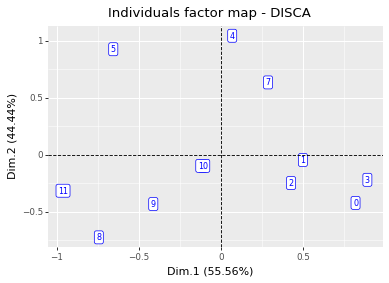

In [4]:
from scientisttools.ggplot import fviz_disca_ind
p = fviz_disca_ind(disca,text_type="label",color="blue",repel=False)
print(p)

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 12 rows containing missing values.
C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 3 rows containing missing values.


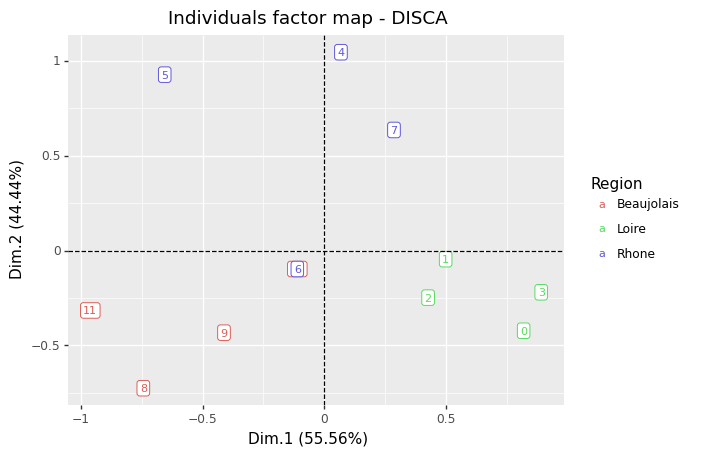

In [5]:
p = fviz_disca_ind(disca,
                  text_type="label",
                  color="Region",
                  repel=False)
print(p)

In [6]:
# Using kmeans
from sklearn.cluster import KMeans
import numpy as np
row_coord = disca.row_coord_
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(row_coord)
kmeans.labels_

array([0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1])

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


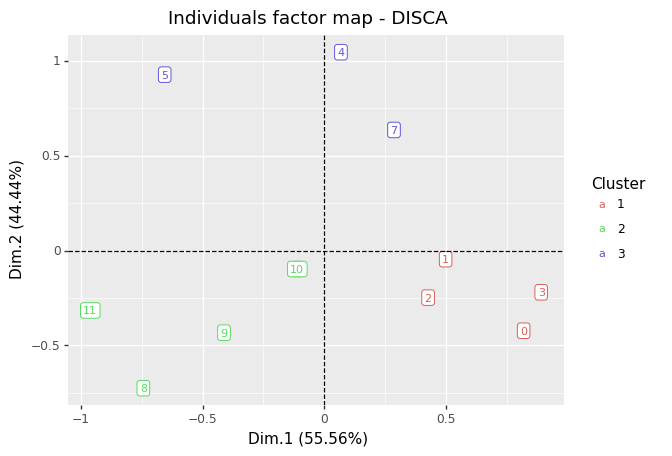

In [7]:
p = fviz_disca_ind(disca,
                  text_type="label",
                  color=kmeans,
                  gradient_cols = ["blue", "yellow", "red"],
                  repel=False)
print(p)